In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings 
import seaborn as sns
filterwarnings('ignore')

In [2]:
df = pd.read_csv("brfss_reduced.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CHD_OR_MI            434058 non-null  float64
 1   SEX                  438693 non-null  int64  
 2   AGE                  438693 non-null  int64  
 3   HEALTH               437532 non-null  float64
 4   PHYSICAL_HEALTH      429199 non-null  float64
 5   MENTAL_HEALTH        430776 non-null  float64
 6   PHYSICAL_ACTIVITIES  437765 non-null  float64
 7   BLOOD_PRESSURE       436781 non-null  float64
 8   HIGH_CHOLESTEROL     374713 non-null  float64
 9   SKIN_CANCER          437252 non-null  float64
 10  CANCER               437329 non-null  float64
 11  BRONCHITIS           436586 non-null  float64
 12  DEPRESSIVE_DISORDER  436176 non-null  float64
 13  KIDNEY_DISEASE       436880 non-null  float64
 14  DIABETES             437708 non-null  float64
 15  ARTHRITIS        

## Valores nulos

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])
    
  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)
  
  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(20,29))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)
  
  

  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()


In [6]:
df.isna().sum()

CHD_OR_MI               4635
SEX                        0
AGE                        0
HEALTH                  1161
PHYSICAL_HEALTH         9494
MENTAL_HEALTH           7917
PHYSICAL_ACTIVITIES      928
BLOOD_PRESSURE          1912
HIGH_CHOLESTEROL       63980
SKIN_CANCER             1441
CANCER                  1364
BRONCHITIS              2107
DEPRESSIVE_DISORDER     2517
KIDNEY_DISEASE          1813
DIABETES                 985
ARTHRITIS               2896
BMI                    46852
DIFFICULTY_WALKING     19830
SMOKE                  24461
TABACCO_PRODUCTS       22882
E_CIGARETTES           23938
HEAVY_DRINKERS         34993
HIV                    51856
FRUITS                 51087
VEGETABLES             60127
FRIED_POTATOES         44765
ETHNICITY                  0
dtype: int64

****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
               Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0      HIGH_CHOLESTEROL          374713        63980   14.584
1            VEGETABLES          378566        60127   13.706
2                   HIV          386837        51856   11.821
3                FRUITS          387606        51087   11.645
4                   BMI          391841        46852   10.680
5        FRIED_POTATOES          393928        44765   10.204
6        HEAVY_DRINKERS          403700        34993    7.977
7                 SMOKE          414232        24461    5.576
8          E_CIGARETTES          414755        23938    5.457
9      TABACCO_PRODUCTS          415811        22882    5.216
10   DIFFICULTY_WALKING          418863        19830    4.

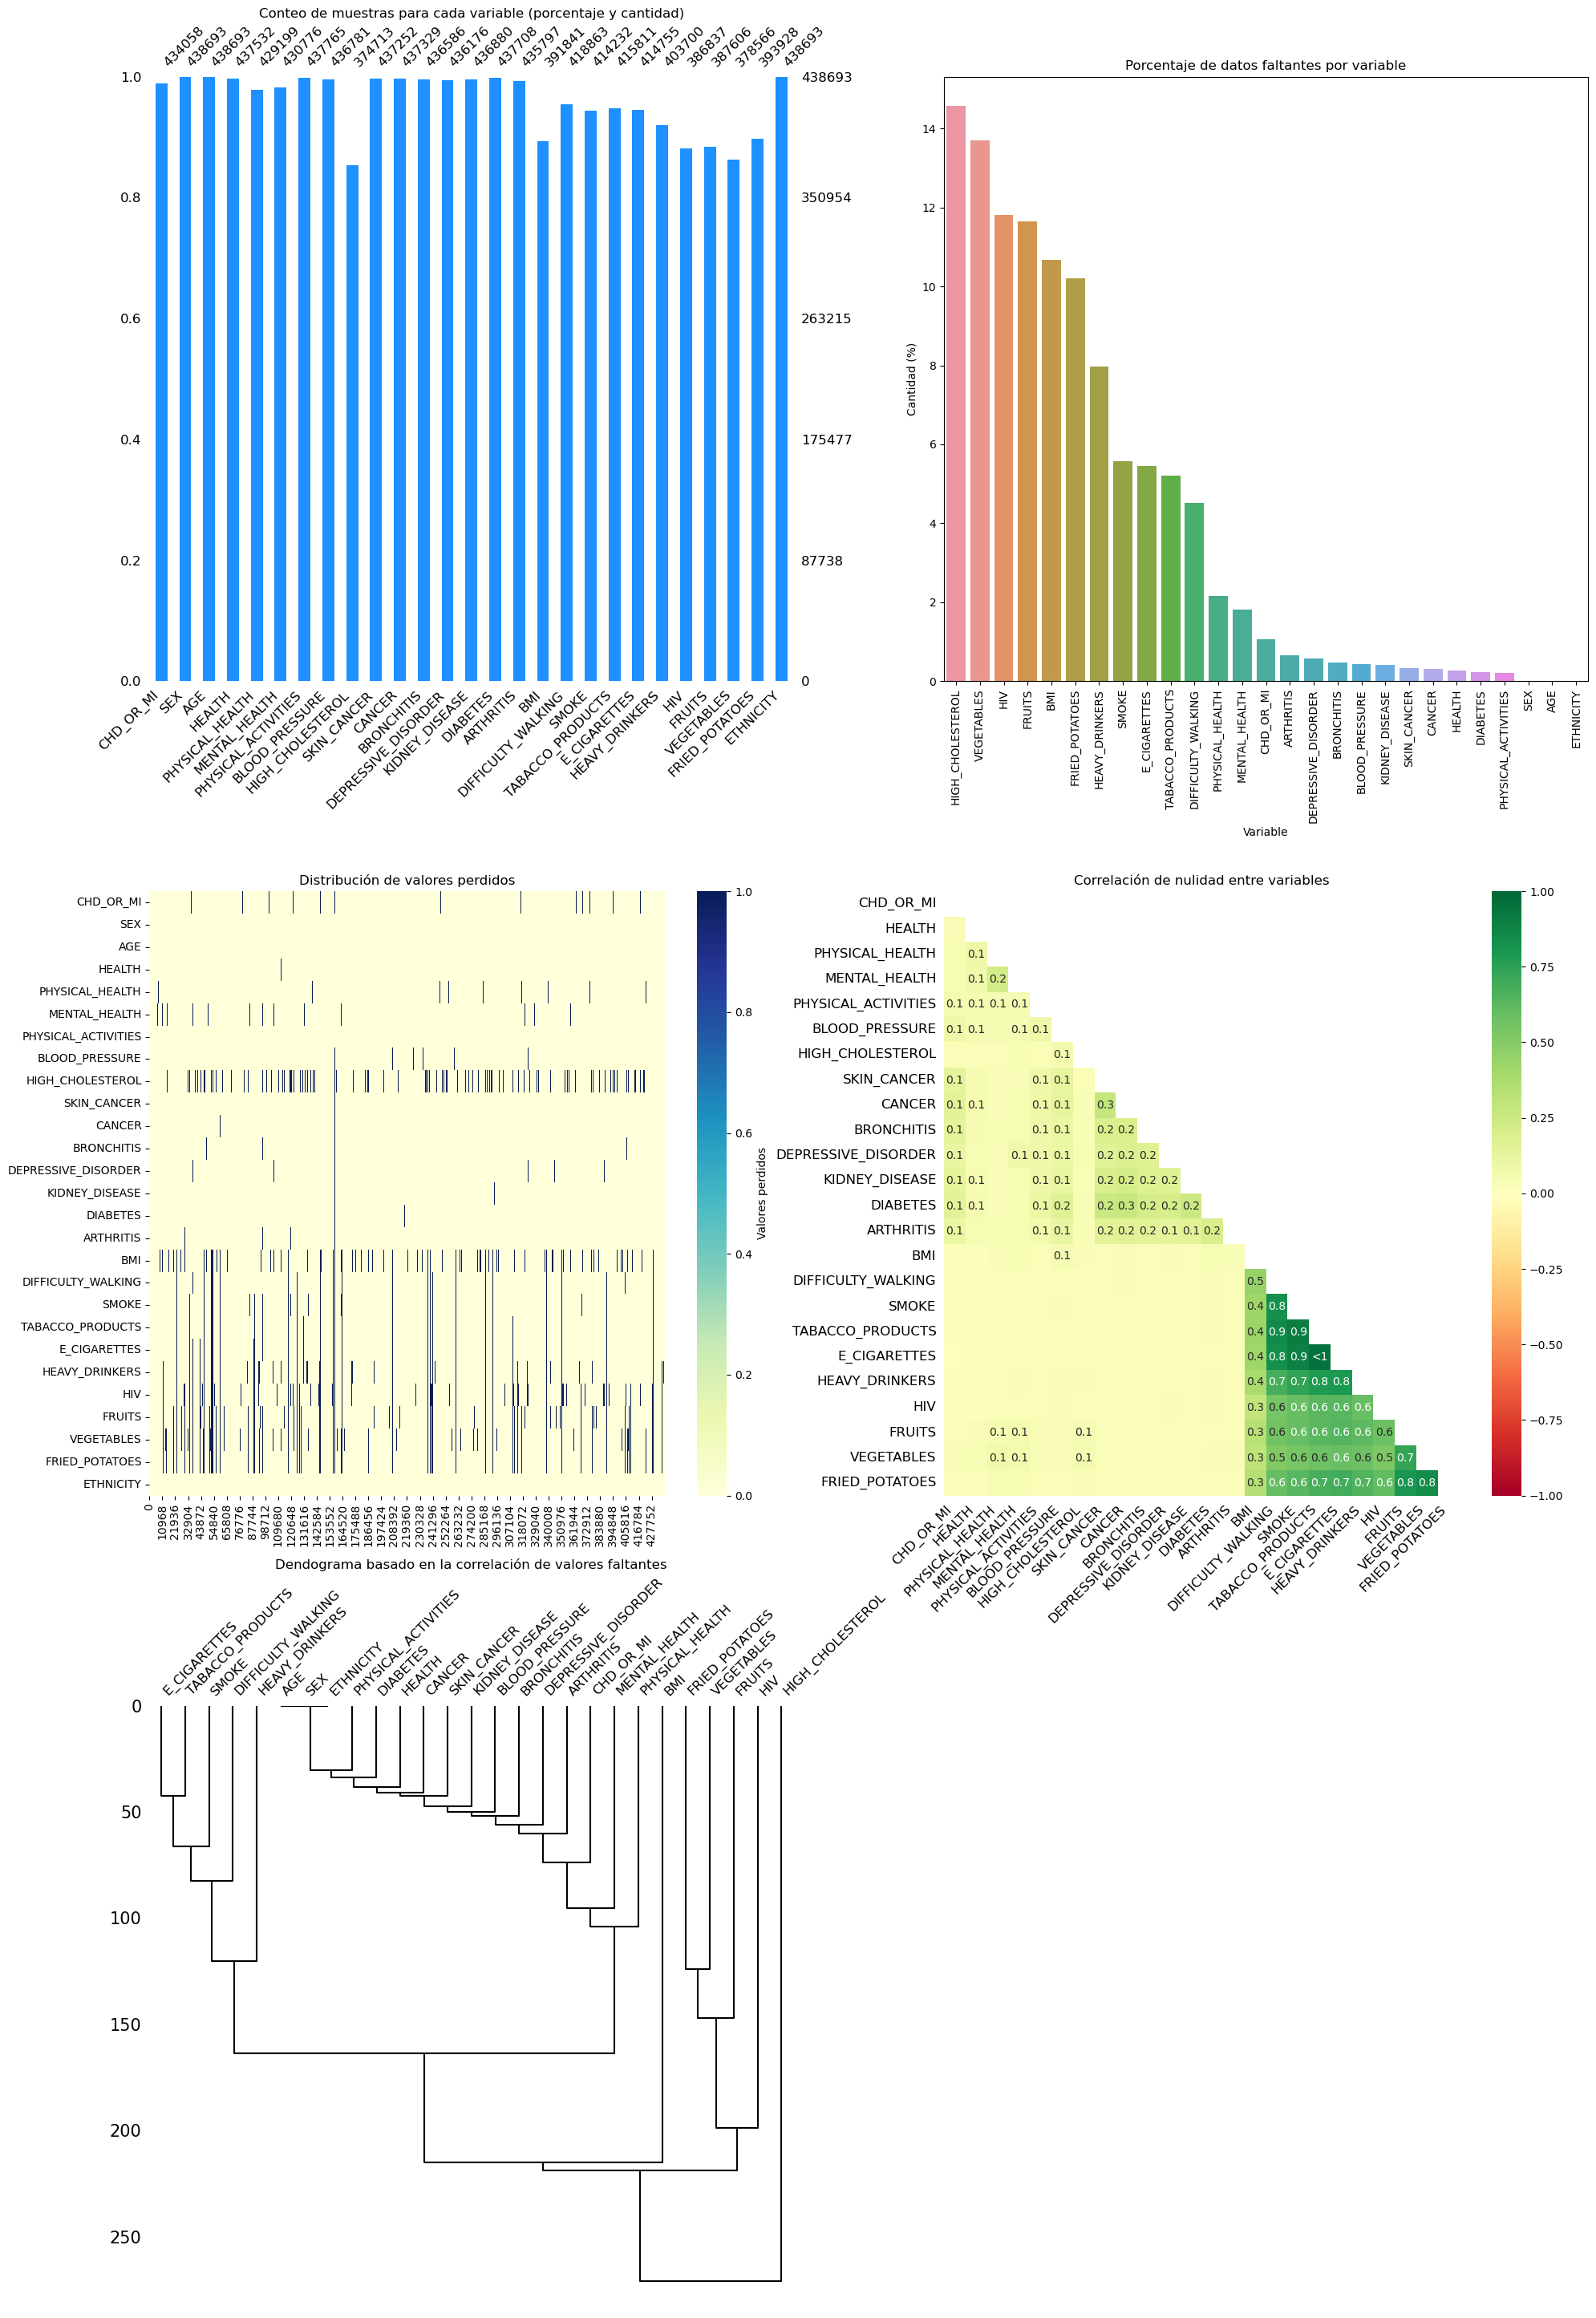

In [7]:
report_missings(df)

## Análisis univariante

In [9]:
df.columns.values

array(['CHD_OR_MI', 'SEX', 'AGE', 'HEALTH', 'PHYSICAL_HEALTH',
       'MENTAL_HEALTH', 'PHYSICAL_ACTIVITIES', 'BLOOD_PRESSURE',
       'HIGH_CHOLESTEROL', 'SKIN_CANCER', 'CANCER', 'BRONCHITIS',
       'DEPRESSIVE_DISORDER', 'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS',
       'BMI', 'DIFFICULTY_WALKING', 'SMOKE', 'TABACCO_PRODUCTS',
       'E_CIGARETTES', 'HEAVY_DRINKERS', 'HIV', 'FRUITS', 'VEGETABLES',
       'FRIED_POTATOES', 'ETHNICITY'], dtype=object)

In [10]:
var = ['CHD_OR_MI', 'SEX', 'HEALTH', 'PHYSICAL_HEALTH',
       'MENTAL_HEALTH', 'PHYSICAL_ACTIVITIES', 'BLOOD_PRESSURE',
       'HIGH_CHOLESTEROL', 'SKIN_CANCER', 'CANCER', 'BRONCHITIS',
       'DEPRESSIVE_DISORDER', 'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS',
       'DIFFICULTY_WALKING', 'SMOKE', 'TABACCO_PRODUCTS',
       'E_CIGARETTES', 'HEAVY_DRINKERS', 'HIV', 'FRUITS', 'VEGETABLES',
       'FRIED_POTATOES', 'ETHNICITY']
varNumericas = ['AGE', 'BMI']

In [11]:
def pltCountplot(cats,data):    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=data, ax=axis[i][j])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center") 
            index += 1



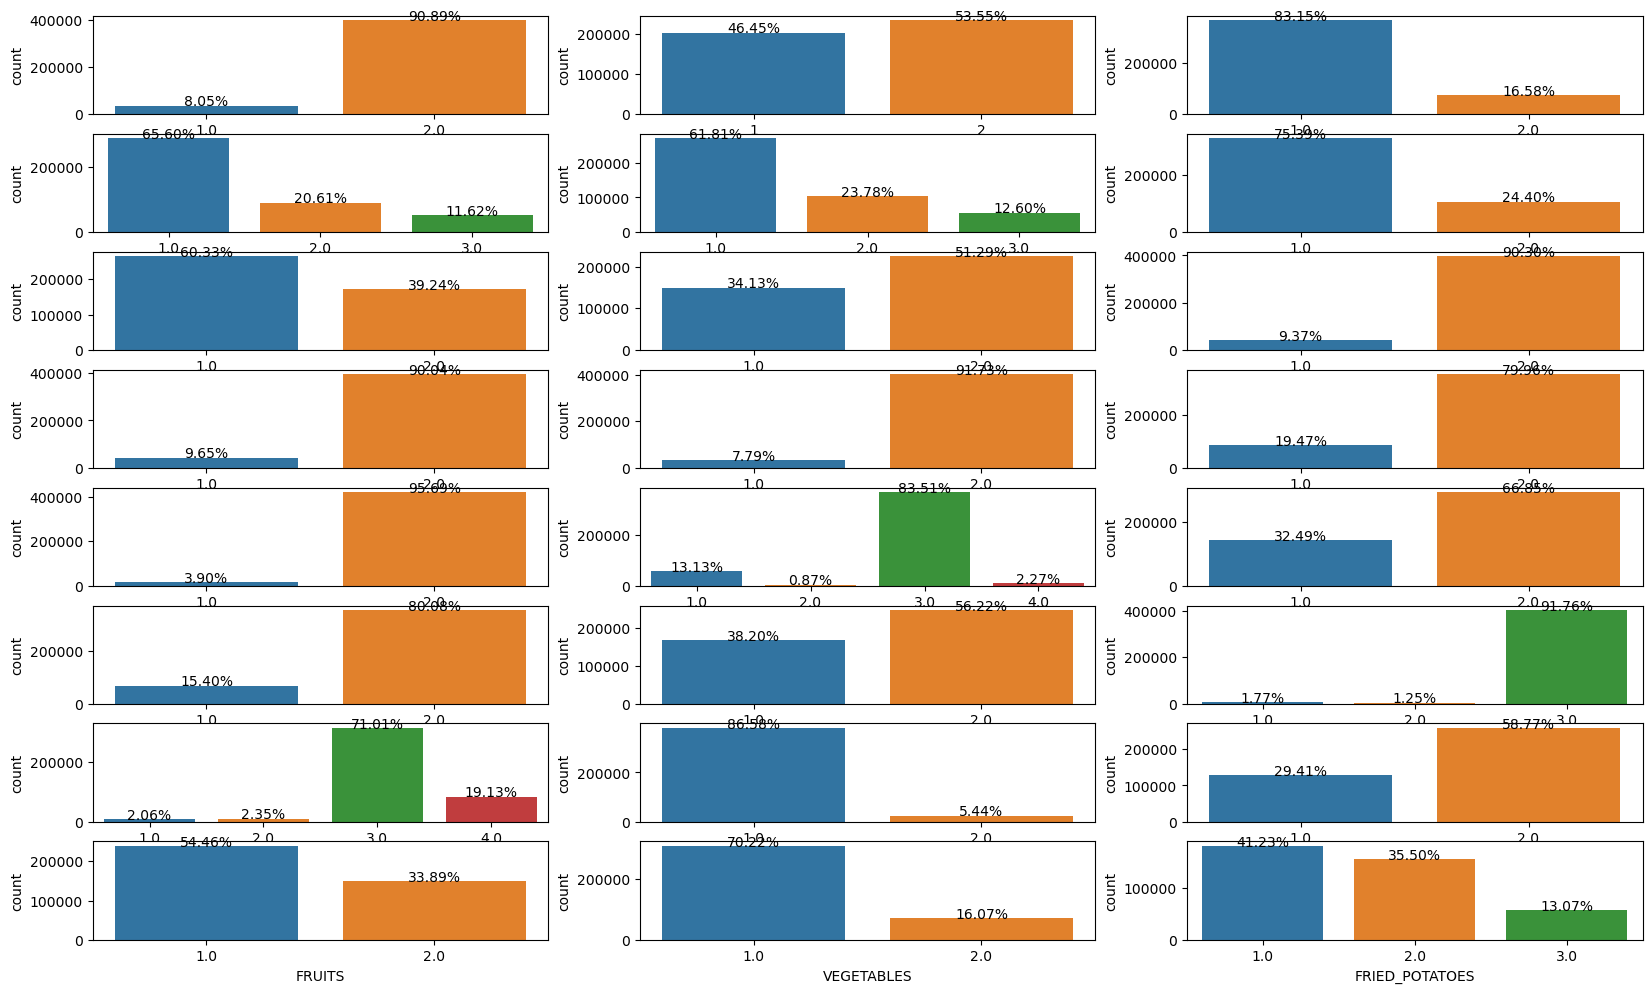

In [12]:
pltCountplot(var, df)

#################### AGE ####################
                     Histograma                     


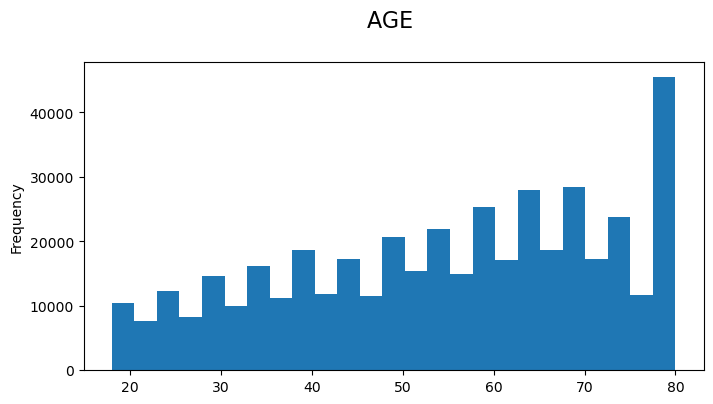



                     Boxplot                     


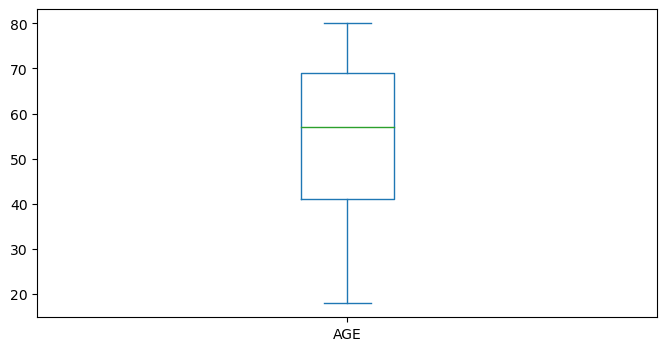




#################### BMI ####################
                     Histograma                     


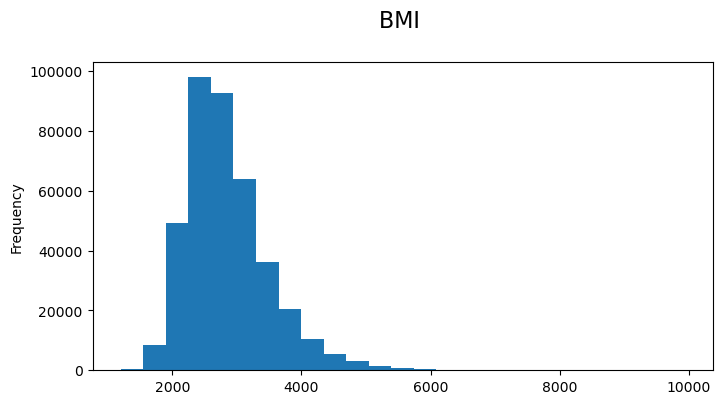



                     Boxplot                     


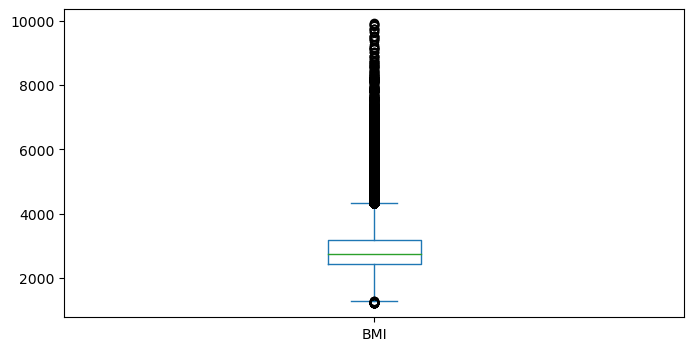

In [13]:
##Análisis Numérico
def analisisNumericas(df, variable):

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()
for numerica in varNumericas:
  print("#"*20,numerica,"#"*20)
  analisisNumericas(df, numerica)
  print("\n\n")

## Analisis multivariante

<AxesSubplot:xlabel='CHD_OR_MI'>

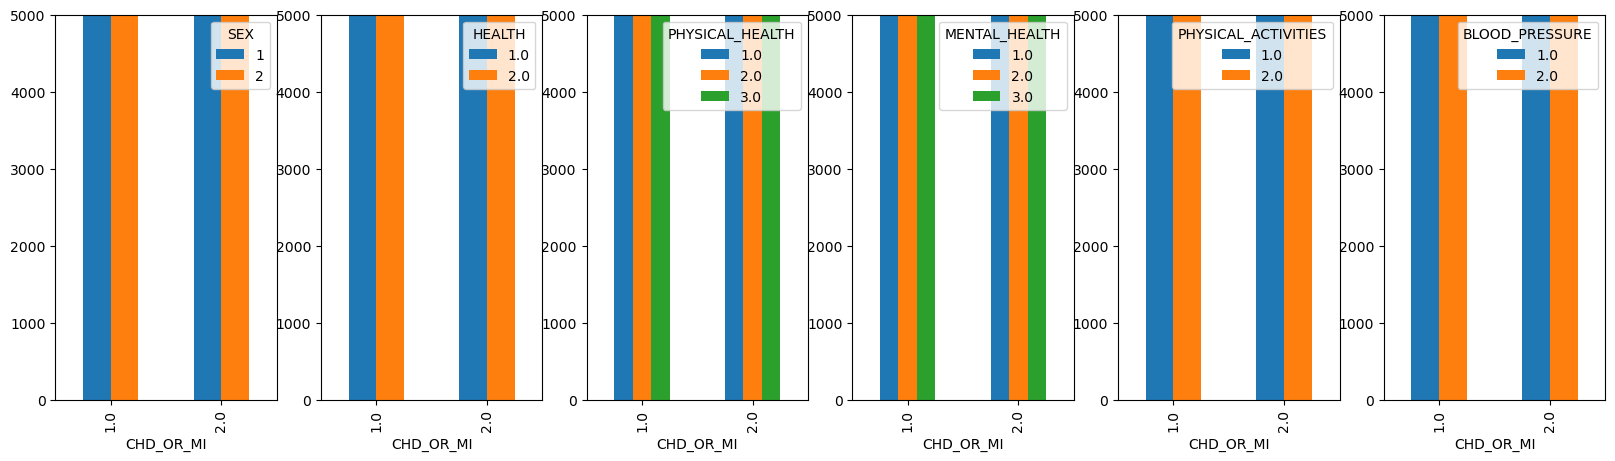

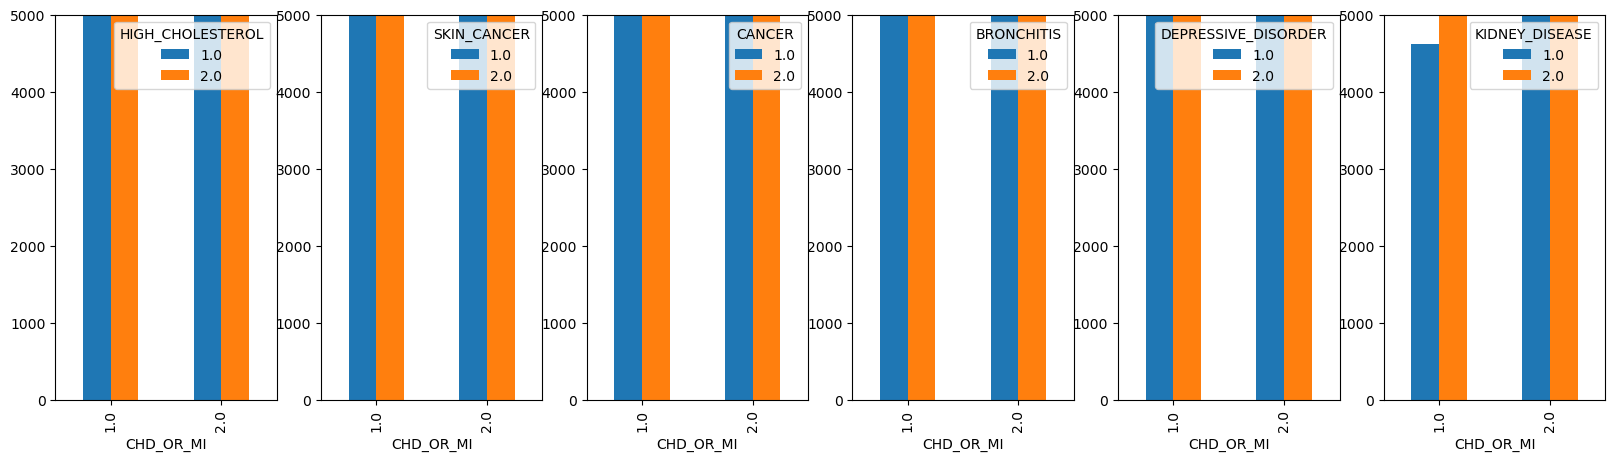

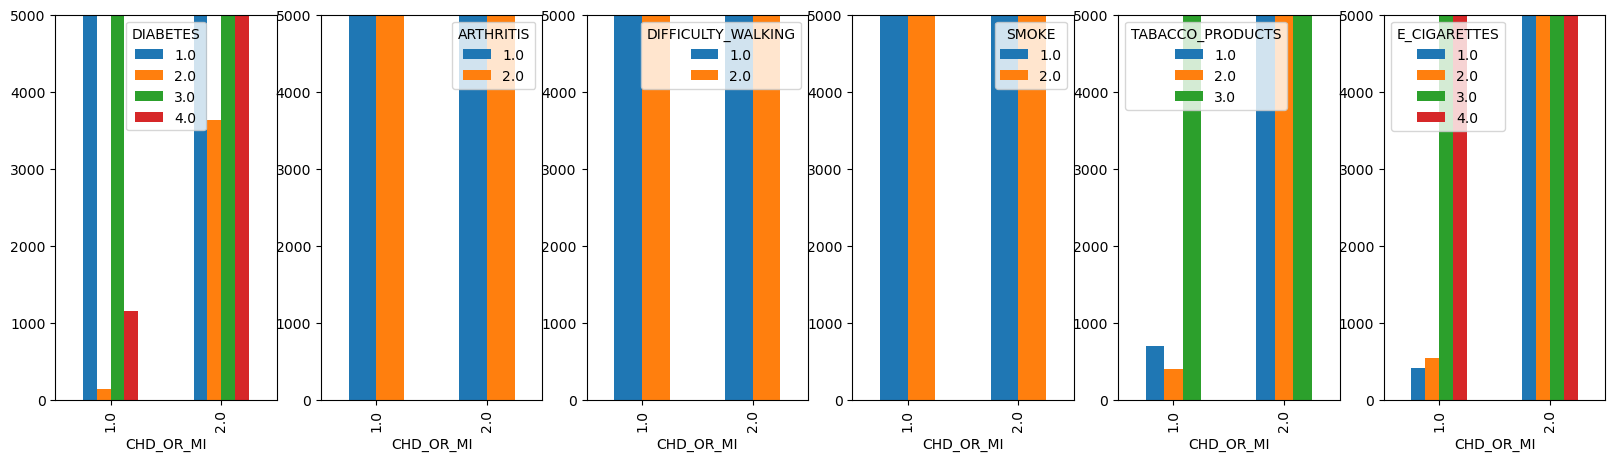

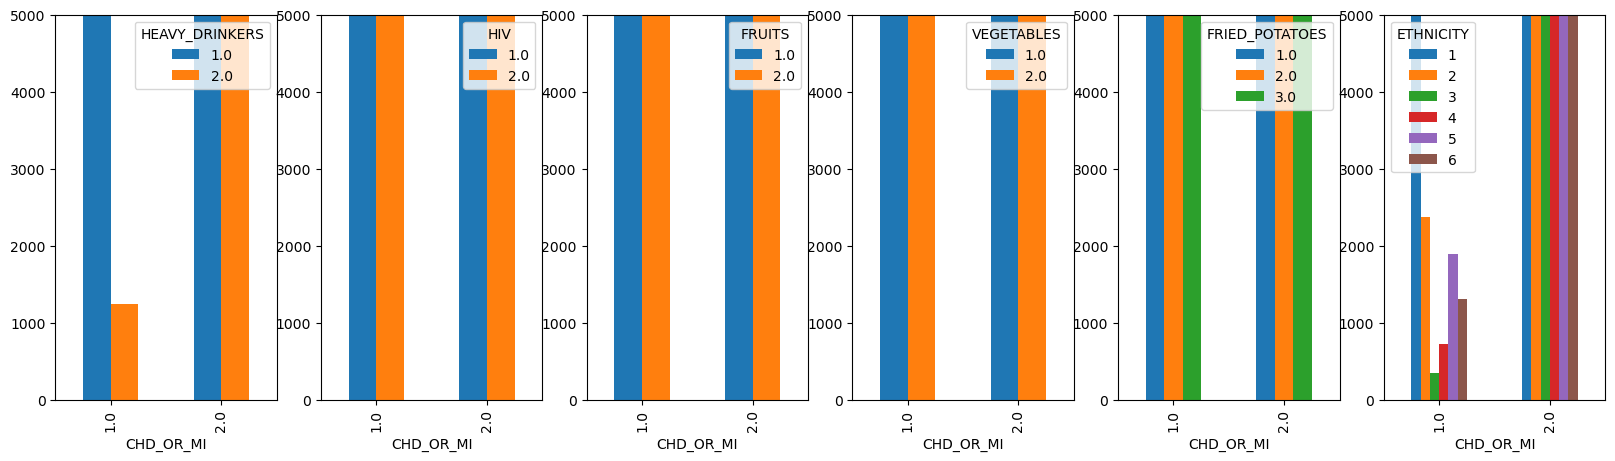

In [14]:
demograficas=pd.concat([df['SEX'],df['HEALTH'],df['PHYSICAL_HEALTH'], df['MENTAL_HEALTH'],
                        df['PHYSICAL_ACTIVITIES'], df['BLOOD_PRESSURE'], df['HIGH_CHOLESTEROL'], df['SKIN_CANCER'], df['CANCER'],
                        df['BRONCHITIS'], df['DEPRESSIVE_DISORDER'], df['KIDNEY_DISEASE'], df['DIABETES'], df['ARTHRITIS'],
                        df['DIFFICULTY_WALKING'], df['SMOKE'], df['TABACCO_PRODUCTS'], df['E_CIGARETTES'], df['HEAVY_DRINKERS'],
                        df['HIV'], df['FRUITS'], df['VEGETABLES'], df['FRIED_POTATOES'], df['ETHNICITY'],
                        df['CHD_OR_MI']],axis=1)
fig,(ax, ax2, ax3, ax4, ax5, ax6)=plt.subplots(ncols=6,figsize=(20,5))
pd.crosstab(df['CHD_OR_MI'],df['SEX']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['HEALTH']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['PHYSICAL_HEALTH']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['MENTAL_HEALTH']).plot(kind='bar',ax=ax4, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['PHYSICAL_ACTIVITIES']).plot(kind='bar',ax=ax5, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['BLOOD_PRESSURE']).plot(kind='bar',ax=ax6, ylim=[0,5000])

fig,(ax, ax2, ax3, ax4, ax5, ax6)=plt.subplots(ncols=6,figsize=(20,5))
pd.crosstab(df['CHD_OR_MI'],df['HIGH_CHOLESTEROL']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['SKIN_CANCER']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['CANCER']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['BRONCHITIS']).plot(kind='bar',ax=ax4, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['DEPRESSIVE_DISORDER']).plot(kind='bar',ax=ax5, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['KIDNEY_DISEASE']).plot(kind='bar',ax=ax6, ylim=[0,5000])

fig,(ax, ax2, ax3, ax4, ax5, ax6)=plt.subplots(ncols=6,figsize=(20,5))
pd.crosstab(df['CHD_OR_MI'],df['DIABETES']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['ARTHRITIS']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['DIFFICULTY_WALKING']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['SMOKE']).plot(kind='bar',ax=ax4, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['TABACCO_PRODUCTS']).plot(kind='bar',ax=ax5, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['E_CIGARETTES']).plot(kind='bar',ax=ax6, ylim=[0,5000])

fig,(ax, ax2, ax3, ax4, ax5, ax6)=plt.subplots(ncols=6,figsize=(20,5))
pd.crosstab(df['CHD_OR_MI'],df['HEAVY_DRINKERS']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['HIV']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['FRUITS']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['VEGETABLES']).plot(kind='bar',ax=ax4, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['FRIED_POTATOES']).plot(kind='bar',ax=ax5, ylim=[0,5000])
pd.crosstab(df['CHD_OR_MI'],df['ETHNICITY']).plot(kind='bar',ax=ax6, ylim=[0,5000])


In [15]:
df.columns.values

array(['CHD_OR_MI', 'SEX', 'AGE', 'HEALTH', 'PHYSICAL_HEALTH',
       'MENTAL_HEALTH', 'PHYSICAL_ACTIVITIES', 'BLOOD_PRESSURE',
       'HIGH_CHOLESTEROL', 'SKIN_CANCER', 'CANCER', 'BRONCHITIS',
       'DEPRESSIVE_DISORDER', 'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS',
       'BMI', 'DIFFICULTY_WALKING', 'SMOKE', 'TABACCO_PRODUCTS',
       'E_CIGARETTES', 'HEAVY_DRINKERS', 'HIV', 'FRUITS', 'VEGETABLES',
       'FRIED_POTATOES', 'ETHNICITY'], dtype=object)

<AxesSubplot:xlabel='CHD_OR_MI', ylabel='AGE'>

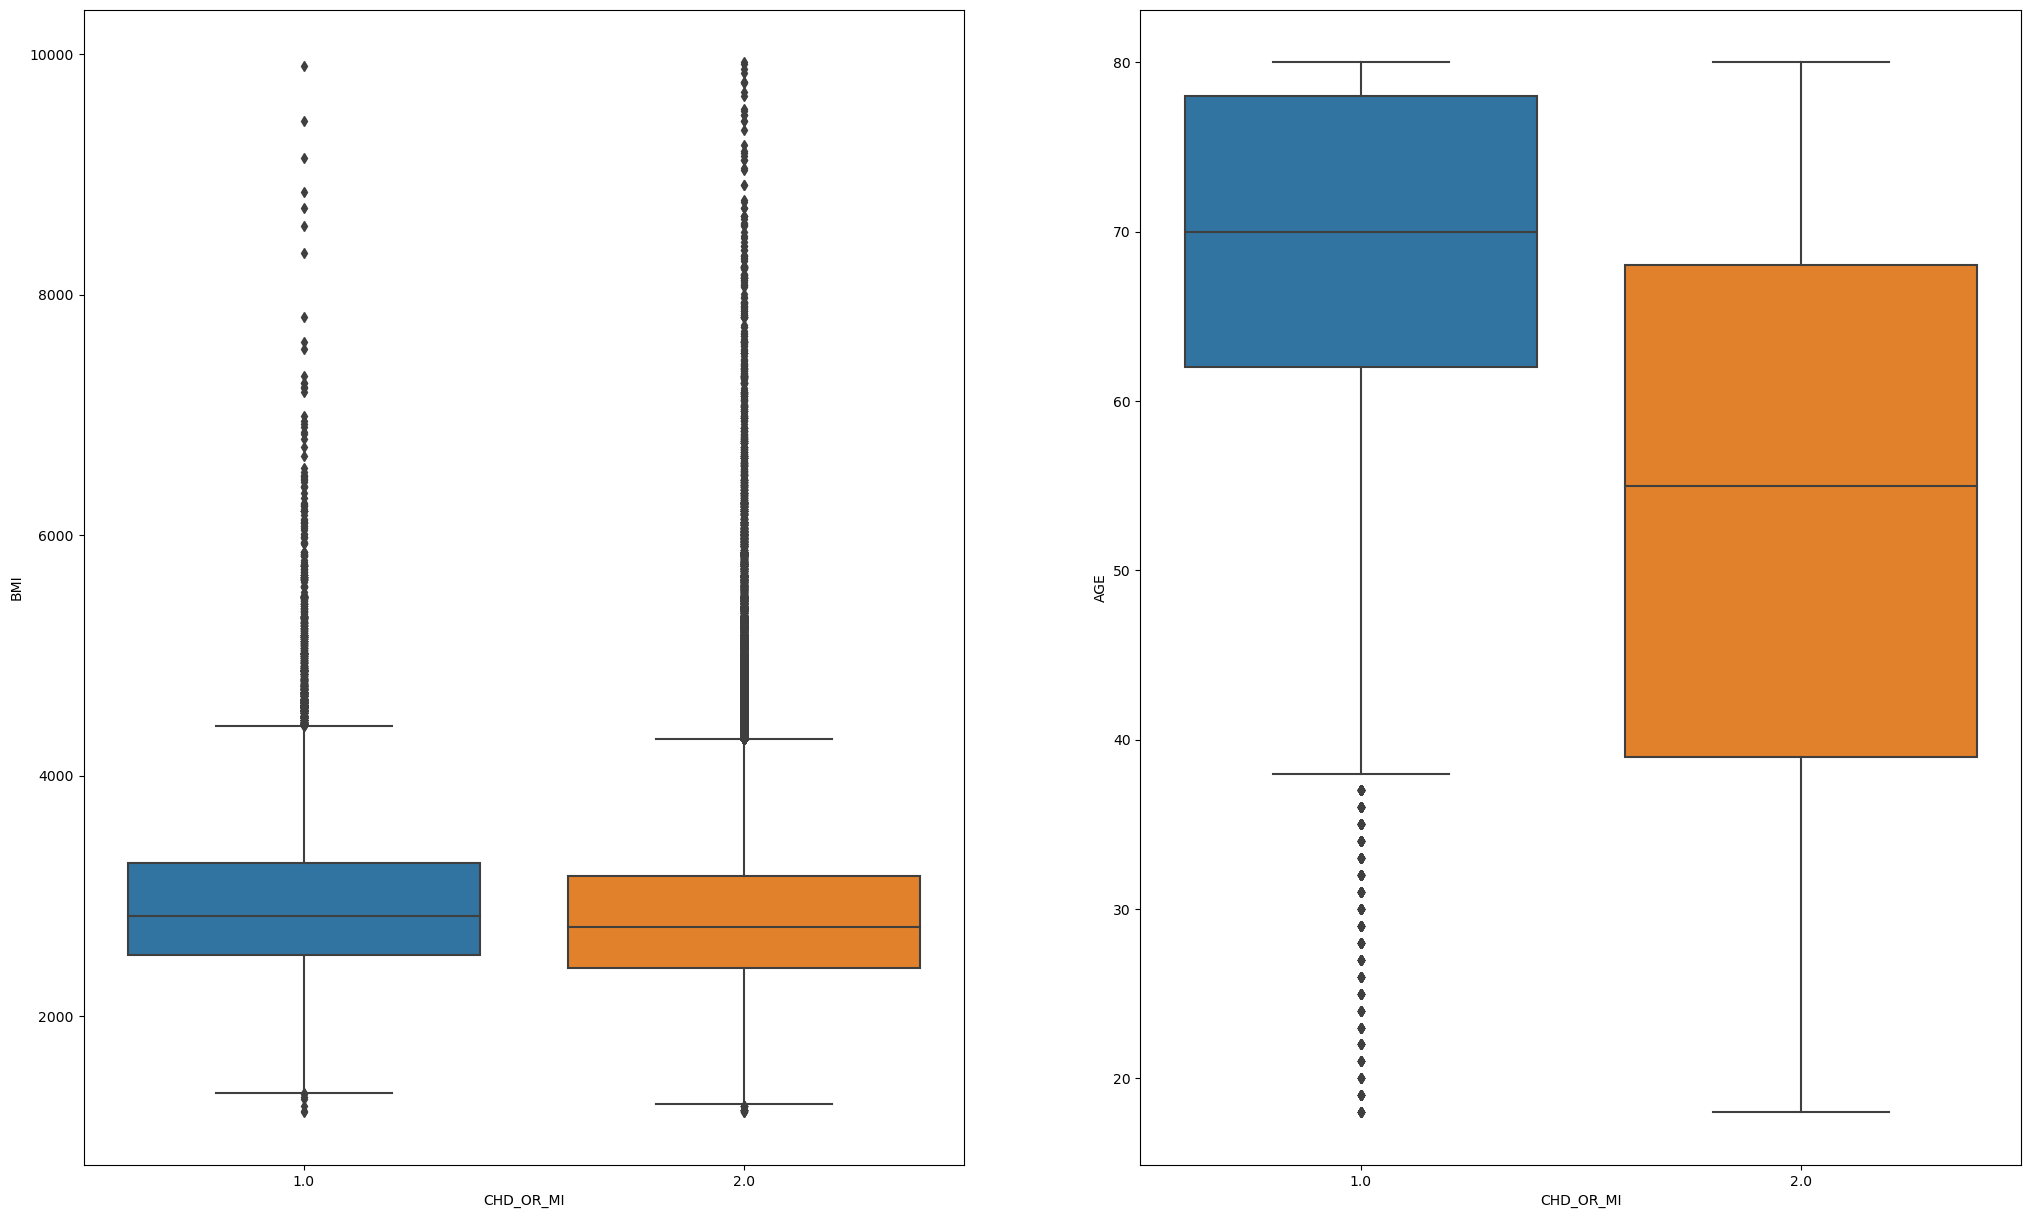

In [16]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,15))

sns.boxplot(x="CHD_OR_MI", y="BMI", data=df, ax=axes[0])
sns.boxplot(x="CHD_OR_MI", y="AGE", data=df, ax=axes[1])